<h1>Task 4: Classification with Logistic Regression.</h1>

<h2>Objective: Build a binary classifier using logistic regression.<br>
Tools: Scikit-learn, Pandas, Matplotlib</h2>

<h3>Task to be performed:</h3>
<ol>
<li>Choose a binary classification dataset.
<li>Train/test split and standardize features.
<li>Fit a Logistic Regression model.
<li>Evaluate with confusion matrix, precision, recall, ROC-AUC.
<li>Tune threshold and explain sigmoid function.
</ol>

<h3>Dataset:- Breast Cancer Wisconsin (Diagnostic) Dataset downloaded from Kaggle </h3>

In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_auc_score, roc_curve, precision_score, recall_score
)

<h5>T-1:- Choose a binary classification dataset.</h5>

In [2]:
#Load the dataset
df = pd.read_csv("data.csv")

In [3]:
#Display information
print("Initial Columns:\n", df.columns)
print("\nDataset Info:")
print(df.info())

Initial Columns:
 Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 n

In [4]:
# Handle categorical features
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

In [5]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_wor

In [6]:
# Drop the column with missing values
df.drop(columns=['Unnamed: 32'], inplace=True)

In [7]:
# Separate features and target
# Assumes 'diagnosis' column is the binary target
X = df.drop(columns=['diagnosis', 'id']) # Assuming 'id' is not a feature
y = df['diagnosis']

<h5>T-2:- Train/test split and standardize features.</h5>

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<h5>T-3:- Fit a Logistic Regression model.</h5>

In [9]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [10]:
# Predict probabilities and classes
y_proba = model.predict_proba(X_test_scaled)[:, 1]
y_pred = (y_proba >= 0.5).astype(int)

<h5>T-4:- Evaluate with confusion matrix, precision, recall, ROC-AUC.</h5>

In [11]:
cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print("\nEvaluation Metrics:")
print("Confusion Matrix:\n", cm)
print("Precision:", round(precision, 2))
print("Recall:", round(recall, 2))
print("ROC AUC Score:", round(roc_auc, 2))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Evaluation Metrics:
Confusion Matrix:
 [[70  1]
 [ 2 41]]
Precision: 0.98
Recall: 0.95
ROC AUC Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



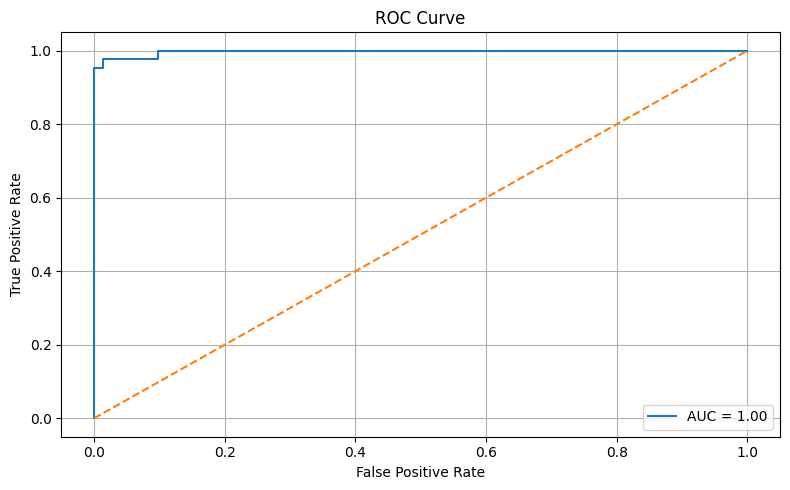

In [12]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

<h5>T-5:- Tune threshold and explain sigmoid function.</h5>

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


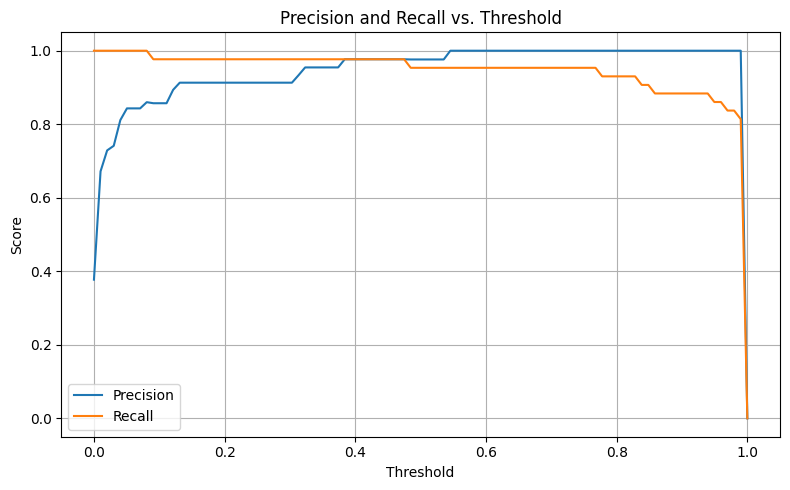

In [13]:
# Plot precision/recall vs threshold
precisions, recalls = [], []
thresholds_plot = np.linspace(0, 1, 100)
for t in thresholds_plot:
    preds = (y_proba >= t).astype(int)
    precisions.append(precision_score(y_test, preds))
    recalls.append(recall_score(y_test, preds))

plt.figure(figsize=(8, 5))
plt.plot(thresholds_plot, precisions, label="Precision")
plt.plot(thresholds_plot, recalls, label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs. Threshold")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [14]:
#Explanation of Sigmoid
print("""
The sigmoid function in logistic regression maps the linear combination of features
to a probability value between 0 and 1:

    sigmoid(z) = 1 / (1 + e^(-z))

Where:
- `z` = w₀ + w₁x₁ + w₂x₂ + ... + wₙxₙ (linear output)
- This output is interpreted as the probability of class 1.
- A threshold (default 0.5) decides final classification:
    - If sigmoid(z) >= threshold → class 1
    - Else → class 0

You can tune the threshold to trade off between precision and recall.
""")


The sigmoid function in logistic regression maps the linear combination of features
to a probability value between 0 and 1:

    sigmoid(z) = 1 / (1 + e^(-z))

Where:
- `z` = w₀ + w₁x₁ + w₂x₂ + ... + wₙxₙ (linear output)
- This output is interpreted as the probability of class 1.
- A threshold (default 0.5) decides final classification:
    - If sigmoid(z) >= threshold → class 1
    - Else → class 0

You can tune the threshold to trade off between precision and recall.

